In [ ]:
!pip install soundscapy
!pip install soundscapy[audio]
!pip install scipy==1.14.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 717.0/717.0 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.8/856.8 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 8.6 MB/s eta 0:00:00
  Created wheel for odfpy: filename=odfpy-1.4.1-py2.py3-none-any.whl size=160672 sha256=a60c8d55f9db96892e5e76ba2663874d98c56bc7f2405452aea8cc7c15268cd1
  Stored in directory: /root/.cache/pip/wheels/d6/1d/c8/8c29be1d73ca42d15977c75193d9f39a98499413c2838ac54c
Successfully built odfpy
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.7/158.7 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.8/162.8 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from soundscapy import AudioAnalysis
from soundscapy import AnalysisSettings
from soundscapy import Binaural
import json
from pathlib import Path
import sys
sys.path.append('../..')
import warnings
warnings.filterwarnings("ignore")

<frozen importlib._bootstrap>:1047: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen

In [ ]:
analysis = AudioAnalysis()

In [ ]:
import json

# Open and load the JSON file
with open("Levels_AMM.json", "r") as f:
    levels = json.load(f)
# Verify the structure of the levels data
print("Available keys in levels:", levels.keys())


Available keys in levels: dict_keys(['REC563', 'REC564', 'REC565', 'REC566', 'REC567', 'REC568', 'REC569', 'REC570', 'REC571', 'REC572', 'REC573', 'REC574', 'REC575', 'REC576', 'REC577', 'REC578', 'REC579', 'REC580', 'REC581', 'REC582', 'REC583', 'REC584', 'REC585', 'REC586', 'REC587', 'REC588', 'REC589', 'REC590', 'REC591', 'REC592', 'REC593', 'REC594', 'REC595', 'REC596', 'REC597', 'REC598', 'REC599', 'REC600', 'REC601', 'REC602', 'REC603', 'REC604', 'REC605', 'REC606', 'REC607', 'REC608', 'REC609', 'REC610', 'REC611', 'REC612', 'REC613', 'REC614', 'REC615', 'REC616', 'REC617', 'REC618', 'REC619', 'REC620', 'REC621', 'REC622', 'REC623', 'REC624', 'REC625', 'REC626', 'REC627', 'REC628', 'REC629', 'REC630', 'REC631', 'REC632', 'REC633', 'REC634', 'REC635', 'REC636', 'REC637'])


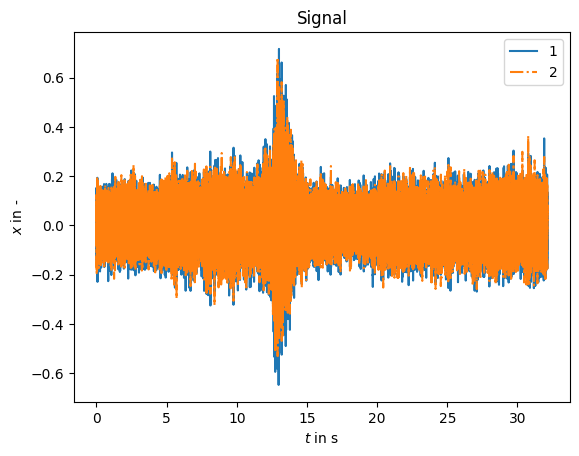

In [26]:
binaural_wav = "REC563.wav"
b = Binaural.from_wav(binaural_wav)
b.plot();

In [ ]:
#binaural_wav = "REC563.wav"
#b = Binaural.from_wav(binaural_wav)
#b.plot();
# Calibration
decibel = (levels[b.recording]["Left"], levels[b.recording]["Right"])
print(f"Calibration levels: {decibel}")
b.calibrate_to(decibel, inplace=True)


Calibration levels: (71.37, 71.02)


Signal([[ 0.00128797  0.00297146  0.00749794 ... -0.11377066 -0.10466022
  -0.09501228]
 [ 0.01612502  0.0117903   0.00939302 ... -0.12006361 -0.11944146
  -0.11748036]])

In [ ]:
#check it by comparing it to what we already knew were the correct level
print(f"Predefined levels: {levels[b.recording]}")
print(f"Calculated Levels: {b.pyacoustics_metric('Leq', statistics=['avg'], as_df=False)}")

Predefined levels: {'Left': 71.37, 'Right': 71.02}
Calculated Levels: {'Left': {'Leq': 71.37455888295332}, 'Right': {'Leq': 71.02466011774777}}


In [27]:
metric = "LZeq"
stats = ("avg", 10, 50, 90, 95, "max")
label = "LZeq"
b.pyacoustics_metric(metric, stats, label, as_df=False)

{'Left': {'LZeq': 71.37264665098729,
  'LZeq_10': 73.10464568118266,
  'LZeq_50': 70.18155598593006,
  'LZeq_90': 68.47445385606954,
  'LZeq_95': 68.09650468931227,
  'LZeq_max': 79.90182075205605},
 'Right': {'LZeq': 71.02090309862459,
  'LZeq_10': 72.78537985993172,
  'LZeq_50': 69.87442857404848,
  'LZeq_90': 68.16785170810492,
  'LZeq_95': 67.7374514029374,
  'LZeq_max': 79.62474940294533}}

In [78]:
import pandas as pd

# Define the metrics to compute (excluding roughness)
metrics = ["loudness_zwtv", "sharpness_din_from_loudness"]

# Define the statistics to compute (5th percentile, 50th percentile, avg, max)
stats = (5, 50, 'avg', 'max')

# Dictionary to store results
results = {}

# Compute each metric separately and store results
for metric in metrics:
    print(f"Computing {metric}...")

    # Compute metric and store results in dictionary
    results[metric] = b.mosqito_metric(metric, statistics=stats, as_df=True, parallel=True, func_args={'field_type': 'free'})

# Combine all results into a single DataFrame
final_results = pd.concat(results.values(), axis=1)

# Display the final results
print(final_results)


Computing loudness_zwtv...
Computing sharpness_din_from_loudness...
                         N_5       N_50      N_avg      N_max        N_5  \
Recording Channel                                                          
REC563    Left     20.091380  16.666380  16.872344  34.355973  20.091380   
          Right    19.152523  15.976504  16.138768  30.175875  19.152523   

                        N_50      N_avg      N_max       S_5      S_50  \
Recording Channel                                                        
REC563    Left     16.666380  16.872344  34.355973  1.389276  1.146823   
          Right    15.976504  16.138768  30.175875  1.330466  1.110711   

                      S_avg      S_max  
Recording Channel                       
REC563    Left     1.173159  16.278825  
          Right    1.133207  19.105438  


In [29]:
#Step2: Apply bandstop filter
import numpy as np
import scipy.signal as signal
import librosa
import librosa.display
import matplotlib.pyplot as plt
import soundfile as sf

In [30]:
# Load audio file
y, sr = librosa.load(binaural_wav, sr=None, mono=False)

In [ ]:
# Double check if it is loaded as 2-channel binaural
# Print shape information
print(f"Audio Shape: {y.shape}")
print(f"Sample Rate: {sr} Hz")

# Check if it's mono or stereo
if y.ndim == 1:
    print("The audio is MONO.")
elif y.ndim == 2 and y.shape[0] == 2:
    print("The audio is STEREO (2-channel binaural).")
else:
    print(f"Unexpected shape: {y.shape}")


Audio Shape: (2, 1542144)
Sample Rate: 48000 Hz
The audio is STEREO (2-channel binaural).


In [72]:
import numpy as np
import librosa
import soundfile as sf
from scipy.signal import iirnotch, lfilter

# Function to compute dynamic Q factor based on target reduction
def compute_q_factor(target_reduction_db, min_q=0.6, max_q=3.0):
    q_factor = np.clip(9 / (target_reduction_db - 9), min_q, max_q)
    return q_factor

# Define an IIR notch filter with controlled attenuation
def notch_filter_with_db_reduction(data, center_freq, fs, attenuation_db=20):
    # Compute Nyquist frequency
    nyquist = 0.5 * fs

    # Compute dynamic Q factor
    quality_factor = compute_q_factor(attenuation_db)

    # Compute IIR Notch Filter coefficients
    b, a = iirnotch(w0=center_freq / nyquist, Q=quality_factor)

    # Apply filter separately to each channel
    filtered_data = np.copy(data)
    for i in range(filtered_data.shape[0]):
        filtered_data[i] = lfilter(b, a, filtered_data[i])  # Apply the filter

    return filtered_data

# Load original audio
binaural_wav = "REC563.wav"
y, sr = librosa.load(binaural_wav, sr=None, mono=False)

# Apply notch filter with controlled attenuation
target_reduction_db = 20  # Adjust this SPL according to AMM reduction
y_filtered = notch_filter_with_db_reduction(y, center_freq=200, fs=sr, attenuation_db=target_reduction_db)

# Convert back to stereo format before saving
y_filtered = y_filtered.T

# Save as 32-bit FLOAT WAV (to retain [-1,1] scale)
filtered_file_path = "REC563_filtered.wav"
sf.write(filtered_file_path, y_filtered.astype(np.float32), sr, format="WAV", subtype="FLOAT")

# Load the filtered WAV to check SPL
binaural_wav = "REC563_filtered.wav"
b_filtered = Binaural.from_wav(binaural_wav)

# Compute SPL before and after filtering
#spl_original = 20 * np.log10(np.sqrt(np.mean(y**2)) / 20e-6)
#spl_filtered = 20 * np.log10(np.sqrt(np.mean(y_filtered**2)) / 20e-6)

#print(f" Original SPL (LZeq): {spl_original:.2f} dB")
#print(f" Filtered SPL (LZeq): {spl_filtered:.2f} dB")

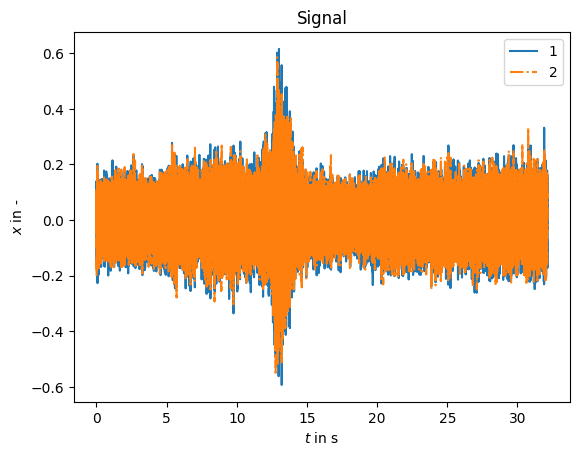

In [73]:
# Plot the filtered wav file
binaural_wav = "REC563_filtered.wav"
b_filtered = Binaural.from_wav(binaural_wav)
b_filtered.plot();

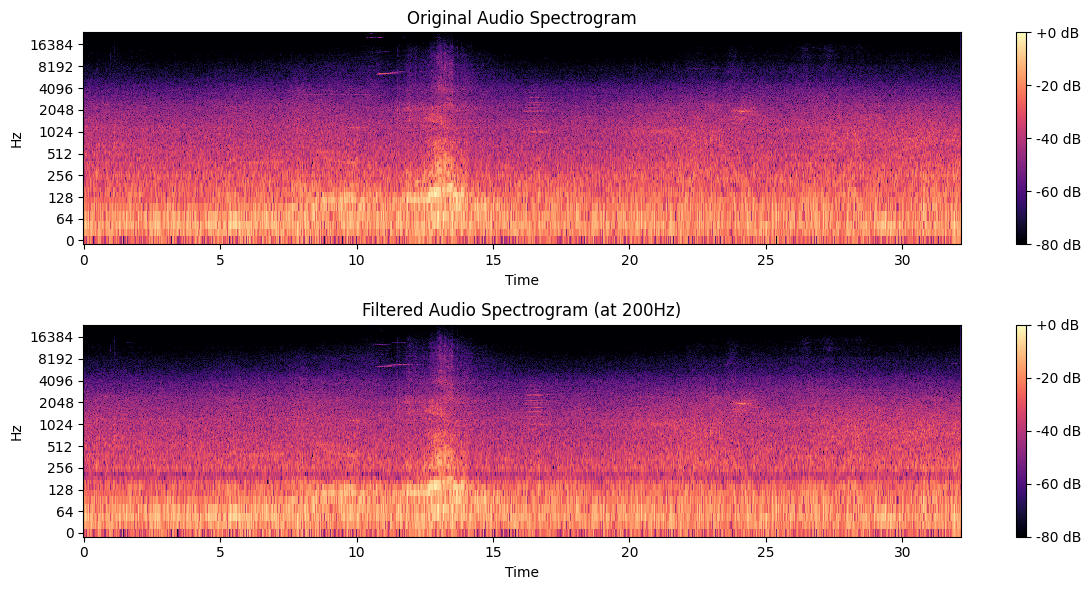

In [75]:
# Step3: Comparison of original and filtered audio
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf

# Load both original and filtered audio
file_path_original = "REC563.wav"
file_path_filtered = "REC563_filtered.wav"

y_original, sr = sf.read(file_path_original)
y_filtered, sr = sf.read(file_path_filtered)

# Convert stereo to mono for visualization (averaging both channels)
y_original_mono = np.mean(y_original, axis=1)
y_filtered_mono = np.mean(y_filtered, axis=1)
#y_filtered_mono = y_filtered_mono / np.max(np.abs(y_filtered_mono)) * np.max(np.abs(y_original_mono))

# Compute spectrograms
plt.figure(figsize=(12, 6))

# Original Spectrogram
plt.subplot(2, 1, 1)
D_original = librosa.amplitude_to_db(np.abs(librosa.stft(y_original_mono)), ref=np.max)
librosa.display.specshow(D_original, sr=sr, x_axis="time", y_axis="log")
plt.title("Original Audio Spectrogram")
plt.colorbar(format="%+2.0f dB")

# Filtered Spectrogram
plt.subplot(2, 1, 2)
D_filtered = librosa.amplitude_to_db(np.abs(librosa.stft(y_filtered_mono)), ref=np.max)
librosa.display.specshow(D_filtered, sr=sr, x_axis="time", y_axis="log")
plt.title("Filtered Audio Spectrogram (at 200Hz)")
plt.colorbar(format="%+2.0f dB")

plt.tight_layout()
plt.show()


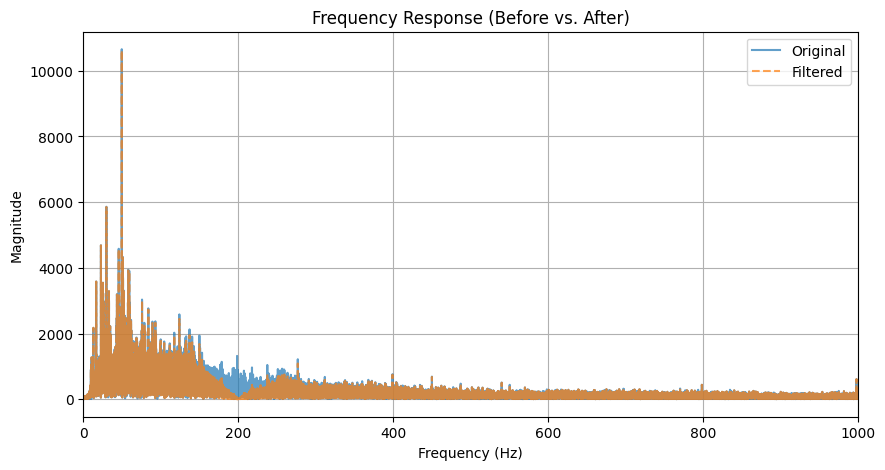

In [76]:
import scipy.fftpack

# Compute FFT for both signals
def compute_fft(y, sr):
    N = len(y)
    freq = np.fft.rfftfreq(N, d=1/sr)  # Frequency axis
    fft_magnitude = np.abs(np.fft.rfft(y))  # Magnitude spectrum
    return freq, fft_magnitude

freq, fft_original = compute_fft(y_original_mono, sr)
freq, fft_filtered = compute_fft(y_filtered_mono, sr)

# Plot frequency response
plt.figure(figsize=(10, 5))
plt.plot(freq, fft_original, label="Original", alpha=0.7)
plt.plot(freq, fft_filtered, label="Filtered", alpha=0.7, linestyle="--")
plt.xlim(0, 1000)  # Show only up to 1000Hz
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Frequency Response (Before vs. After)")
plt.legend()
plt.grid()
plt.show()


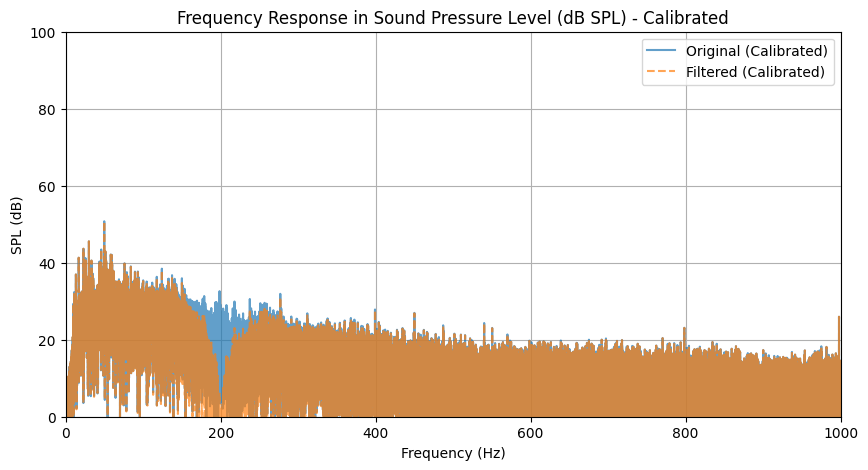

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# Reference sound pressure level in air (20 µPa)
P_ref = 20e-6

# Apply calibration to both signals
y_original_calibrated = y_original_mono
y_filtered_calibrated = y_filtered_mono

# Compute FFT for both signals and convert to SPL
def compute_fft_spl(y, sr):
    N = len(y)  # Number of samples
    freq = np.fft.rfftfreq(N, d=1/sr)  # Frequency axis
    fft_magnitude = np.abs(np.fft.rfft(y)) / N  # Normalize FFT magnitude

    # Convert magnitude to Sound Pressure Level (SPL in dB)
    fft_spl = 20 * np.log10(np.maximum(fft_magnitude, 1e-12) / P_ref)

    return freq, fft_spl

# Compute SPL from FFT
freq, spl_original = compute_fft_spl(y_original_calibrated, sr)
freq, spl_filtered = compute_fft_spl(y_filtered_calibrated, sr)

# Plot frequency response in dB SPL
plt.figure(figsize=(10, 5))
plt.plot(freq, spl_original, label="Original (Calibrated)", alpha=0.7)
plt.plot(freq, spl_filtered, label="Filtered (Calibrated)", alpha=0.7, linestyle="--")
plt.xlim(0, 1000)  # Show only up to 1000Hz
plt.ylim(0, 100)  # Adjusted realistic SPL range
plt.xlabel("Frequency (Hz)")
plt.ylabel("SPL (dB)")
plt.title("Frequency Response in Sound Pressure Level (dB SPL) - Calibrated")
plt.legend()
plt.grid()
plt.show()



In [69]:
binaural_wav_filtered = "REC563_filtered.wav"
b_filtered = Binaural.from_wav(binaural_wav_filtered)
metric = "LZeq"
stats = ("avg", 10, 50, 90, 95, "max")
label = "LZeq"

laeq_filtered = b_filtered.pyacoustics_metric(metric, stats, label, as_df=True)
print(laeq_filtered)

                              LZeq    LZeq_10    LZeq_50    LZeq_90  \
Recording       Channel                                               
REC563_filtered Left     70.452311  72.079688  69.505966  67.671957   
                Right    70.125282  71.824733  69.209854  67.358943   

                           LZeq_95   LZeq_max  
Recording       Channel                        
REC563_filtered Left     67.200343  78.360685  
                Right    66.805147  77.993052  


In [ ]:
import pandas as pd

# Define the metrics to compute (excluding roughness)
metrics = ["loudness_zwtv", "sharpness_din_from_loudness"]

# Define the statistics to compute (5th percentile, 50th percentile, avg, max)
stats = (5, 50, 'avg', 'max')

# Dictionary to store results
results = {}

# Compute each metric separately and store results
for metric in metrics:
    print(f"Computing {metric}...")

    # Compute metric and store results in dictionary
    results[metric] = b_filtered.mosqito_metric(metric, statistics=stats, as_df=True, parallel=True, func_args={'field_type': 'free'})

# Combine all results into a single DataFrame
final_results = pd.concat(results.values(), axis=1)

# Display the final results
print(final_results)

Computing loudness_zwtv...
Computing sharpness_din_from_loudness...
                               N_5       N_50      N_avg      N_max  \
Recording       Channel                                               
REC563_filtered Left     17.619536  14.711864  14.811935  30.132142   
                Right    16.773889  14.086641  14.131816  25.979740   

                               N_5       N_50      N_avg      N_max       S_5  \
Recording       Channel                                                         
REC563_filtered Left     17.619536  14.711864  14.811935  30.132142  1.527088   
                Right    16.773889  14.086641  14.131816  25.979740  1.462328   

                             S_50     S_avg      S_max  
Recording       Channel                                 
REC563_filtered Left     1.255872  1.286073  17.066989  
                Right    1.217717  1.243142  19.876314  


In [ ]:
# computing sharpness and roughness as above